# Laboratorium 4 - Recurrent Neural Network cz. II

# Zadanie 1 - Wprowadzenie
Stwórz model Simple RNN, który będzie przewidywał ceny mieszkań na podstawie danych z [Boston Housing](https://keras.io/api/datasets/boston_housing/). Większość problemów i implementacji powinna już być znana z poprzednich zajęć więć, prześledzimy to rozwiązanie i poszukamy potencjalnych rozwiązań/ulepszeń.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,LSTM, GRU
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 580.7643 - val_loss: 628.9360
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 564.8489 - val_loss: 602.8051
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 491.2272 - val_loss: 553.3395
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 474.5781 - val_loss: 506.1023
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 461.8439 - val_loss: 468.5358
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 377.8490 - val_loss: 435.3266
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 349.4960 - val_loss: 405.7896
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 366.6966 - val_loss: 378.7329
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 322.4930 - val_loss: 354.7696
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 281.4982 - val_loss: 332.6213
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 293.0091 - val_loss: 313.0459
Epoch 12/10

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


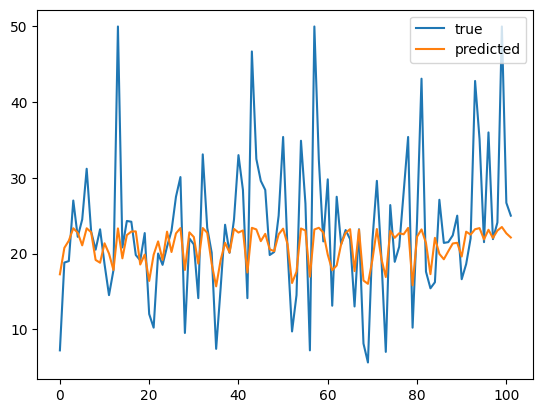

In [7]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 1 - Modyfikacje i usprawnienia
Wyniki nie są zadowalające, spróbuj poprawić ten model. Zaproponuj odpowiednie modyfikacje, może LSTM albo GRU zadziałają. Przetestuj i porównaj wyniki. Jakie wnioski się nasuwają?

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 599.0739 - val_loss: 622.8632
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 521.4869 - val_loss: 585.2330
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1768.9368 - val_loss: 533.9830
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 454.8508 - val_loss: 323.6042
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 311.1128 - val_loss: 376.9715
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 291.9778 - val_loss: 350.0216
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 261.4074 - val_loss: 290.5831
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 238.9362 - val_loss: 241.5743
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 225.0224 - val_loss: 273.8733
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 202.4399 - val_loss: 213.3470
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 177.3925 - val_loss: 218.0072
Epoch 1

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


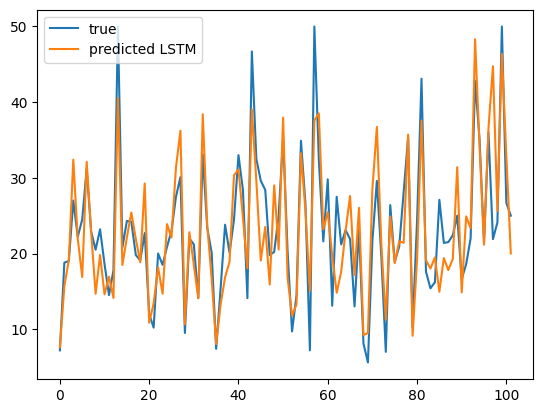

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 575.7568 - val_loss: 623.9000
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 557.1859 - val_loss: 549.8797
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 400.0240 - val_loss: 150.2370
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 152.5377 - val_loss: 121.2951
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 89.9059 - val_loss: 81.7084
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 68.3395 - val_loss: 86.1531
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 87.2387 - val_loss: 80.8162
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 72.3174 - val_loss: 85.1444
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 64.2553 - val_loss: 79.8263
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 71.9537 - val_loss: 81.3899
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 73.9679 - val_loss: 88.7135
Epoch 12/200
11/11 ━━━

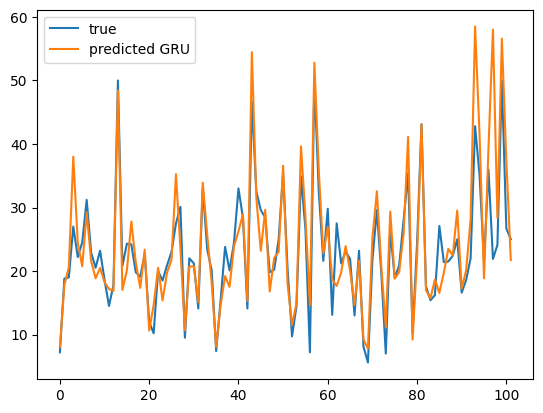

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,LSTM, GRU
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# lstm = tf.keras.layers.LSTM(4)
# output = lstm(X_train_scaled)

model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(units=1))
model.summary()

# model = Sequential()
# model.add(GRU(units=32, input_shape=(X_train.shape[1], 1)))
# model.add(Dense(units=1))
# model.summary()


# model = Sequential()
# model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1)))
# model.add(Dense(units=1))
# model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=200, batch_size=32, validation_split=0.2)

# y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
# plt.plot(y_test, label='true')
# plt.plot(y_pred, label='predicted')
# plt.legend()
# plt.show()


# LSTM
y_pred_lstm = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred_lstm, label='predicted LSTM')
plt.legend()
plt.show()

# GRU
model_gru = Sequential()
model_gru.add(GRU(units=128, input_shape=(X_train.shape[1], 1), activation='relu'))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history_gru = model_gru.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=200, batch_size=32, validation_split=0.2)
y_pred_gru = model_gru.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred_gru, label='predicted GRU')
plt.legend()
plt.show()

# Zadanie 2 - Wprowadzenie

**Return_sequence=True** to argument funkcji warstwy rekurencyjnej w sieciach neuronowych, który określa, czy dana warstwa powinna zwrócić sekwencję wyników (ang. sequence) dla każdego kroku czasowego, czy tylko wynik dla ostatniego kroku czasowego.

W przypadku rekurencyjnych sieci neuronowych (RNN) argument ten jest szczególnie ważny, ponieważ sieci RNN są zdolne do przetwarzania sekwencji danych wejściowych. Każdy krok czasowy w sekwencji jest przetwarzany przez sieć RNN, a wynik w każdym kroku jest używany do wyznaczenia wyniku w następnym kroku.

Jeśli **Return_sequence=True**, to warstwa RNN zwróci sekwencję wyników dla każdego kroku czasowego, co oznacza, że wynik na każdym kroku będzie przekazywany do następnego kroku czasowego. To pozwala na dalsze przetwarzanie przez kolejne warstwy sieci lub analizę wyników dla każdego kroku.

Jeśli **Return_sequence=False**, to warstwa RNN zwróci tylko wynik ostatniego kroku czasowego, co oznacza, że wynik na każdym kroku jest zignorowany poza wynikiem ostatniego kroku. To jest przydatne w przypadku, gdy sieć RNN jest używana do generowania jednego wyniku na końcu sekwencji, np. w zadaniach przewidywania lub generowania sekwencji.

Warto zaznaczyć, że niektóre implementacje sieci RNN pozwalają na ustawienie **Return_sequence=False** dla niektórych warstw i **Return_sequence=True** dla innych, co pozwala na bardziej elastyczne modele sieciowe.

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

## TO DO: Wybierz optymalizator(zastanów sie nad parametrami jakie można mu przypisać oraz dobierz funkcje straty!)
model.compile(optimizer= ??? , loss='')

In [ ]:
history = model.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=200, batch_size=16, validation_split=0.2)

In [ ]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 2 - Modyfikacje i usprawnienia
Dokonaj modyfikacji, zaproponuj rozwiązania oparte o GRU i LSTM. Jakie wnioski płyną z twojej analizy?

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM, Embedding
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [13]:
# Load and scale the Boston housing dataset
(features_train, target_train), (features_test, target_test) = boston_housing.load_data()
scaler = StandardScaler()
features_train_norm = scaler.fit_transform(features_train)
features_test_norm = scaler.transform(features_test)

In [14]:
# RNN model for regression
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=64, input_shape=(features_train.shape[1], 1), return_sequences=True))
rnn_model.add(SimpleRNN(units=32, return_sequences=False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=1))
rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 13, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the RNN model
rnn_model.compile(optimizer=Adam(), loss='mean_squared_error')
rnn_history = rnn_model.fit(features_train_norm[:,:,np.newaxis], target_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 530.2512 - val_loss: 440.7410
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 367.2526 - val_loss: 364.5779
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 302.4796 - val_loss: 324.7090
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 262.8754 - val_loss: 299.7349
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 267.4823 - val_loss: 279.2642
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 246.4123 - val_loss: 260.6729
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 204.8023 - val_loss: 243.8934
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 219.1476 - val_loss: 228.6855
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 183.5879 - val_loss: 214.9748
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 146.0410 - val_loss: 202.5645
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 158.3963 - val_loss: 190.7957
Epoch 12/200
21/21

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


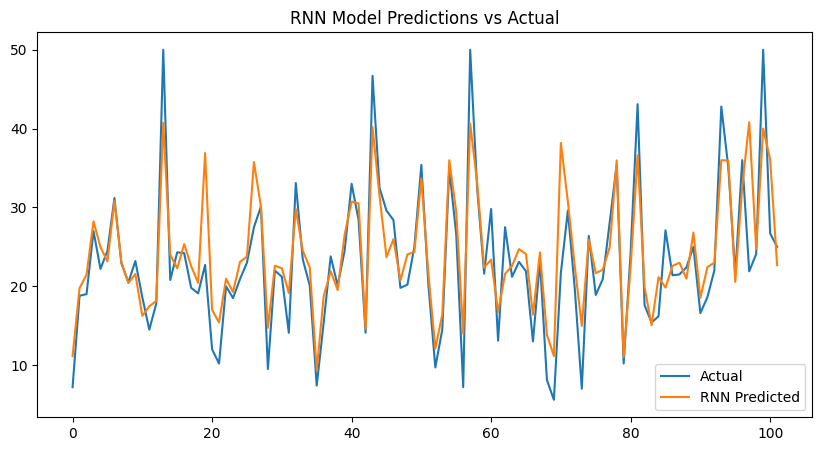

In [16]:
# Predict and plot results
target_pred_rnn = rnn_model.predict(features_test_norm[:,:,np.newaxis])
plt.figure(figsize=(10,5))
plt.plot(target_test, label='Actual')
plt.plot(target_pred_rnn, label='RNN Predicted')
plt.title("RNN Model Predictions vs Actual")
plt.legend()
plt.show()

In [17]:
# LSTM model setup
lstm_model = Sequential()
max_features = 10000  # This should be defined based on your data or preprocessing
embedding_dims = 100
maxlen = features_train.shape[1]
hidden_dims = 50

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


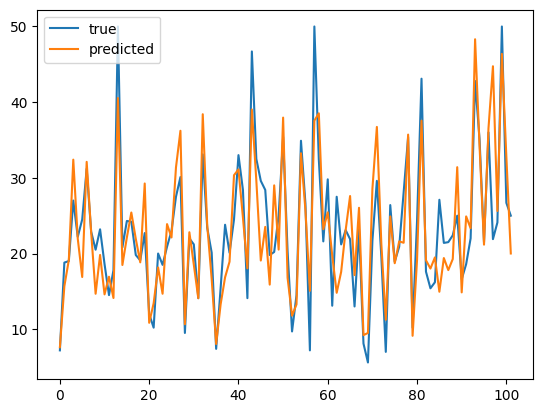

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

lstm_model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
lstm_model.add(LSTM(hidden_dims))
lstm_model.add(Dense(units=1))
lstm_model.summary()

In [19]:
# Compile the LSTM model
lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')
lstm_history = lstm_model.fit(features_train_norm, target_train, batch_size=32, epochs=200, validation_data=(features_test_norm, target_test))

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 549.0812 - val_loss: 459.8913
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 392.5388 - val_loss: 332.9008
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 307.0724 - val_loss: 275.7685
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 241.5979 - val_loss: 246.0612
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 248.8932 - val_loss: 225.7819
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 190.2755 - val_loss: 209.8871
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 192.0009 - val_loss: 196.0701
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 179.4410 - val_loss: 183.7078
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 152.2973 - val_loss: 172.5698
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 144.0142 - val_loss: 162.4493
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 150.3625 - val_loss: 153.3457
Epoch 12

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


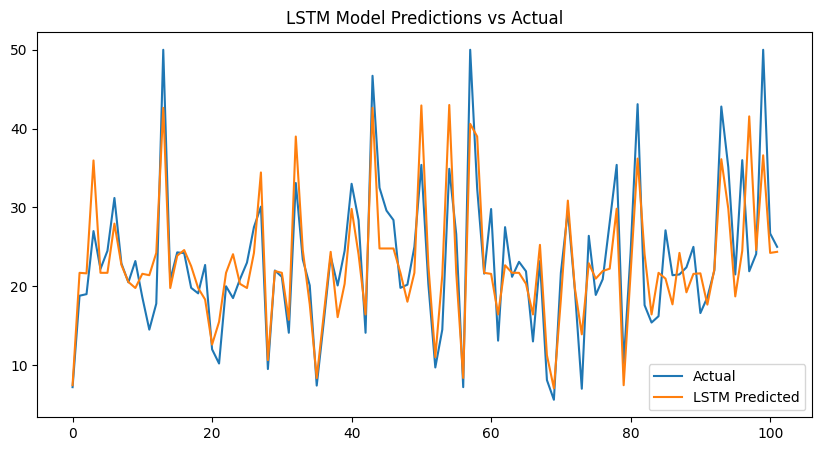

In [20]:
# Predict and plot results for LSTM
target_pred_lstm = lstm_model.predict(features_test_norm)
plt.figure(figsize=(10,5))
plt.plot(target_test, label='Actual')
plt.plot(target_pred_lstm, label='LSTM Predicted')
plt.title("LSTM Model Predictions vs Actual")
plt.legend()
plt.show()

# Zadanie 3 Przetestuj [BLSTM](https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/).

In [22]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [23]:
history = model.fit(X_train_scaled[:,:,np.newaxis], y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 555.2925 - val_loss: 503.4314
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 364.2971 - val_loss: 251.0986
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 237.2044 - val_loss: 194.9348
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 154.0132 - val_loss: 165.6307
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 121.1862 - val_loss: 145.1742
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 145.2723 - val_loss: 130.1729
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 115.3534 - val_loss: 118.1120
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 104.3144 - val_loss: 109.3842
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 86.7956 - val_loss: 103.6906
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 83.1382 - val_loss: 98.8388
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 93.0388 - val_loss: 95.2989
Epoch 12/100


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


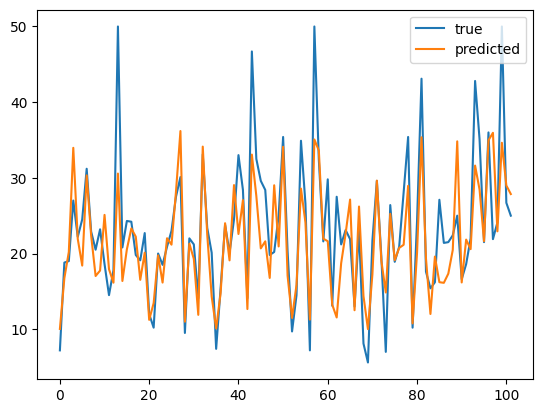

In [24]:
y_pred = model.predict(X_test_scaled[:,:,np.newaxis])
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

# Zadanie 4 - LSTM, GRU, SimpleRNN w zadaniach z tekstem (zbiór Shakespearea)

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Wczytanie danych tekstowych
with open(path_to_file, 'r') as f:
    text = f.read().lower()
print('Długość tekstu:', len(text))

# Tworzenie słownika znaków
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Przygotowanie sekwencji danych wejściowych i wyjściowych
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i:i + maxlen])
    next_chars.append(text[i + maxlen])
print('Liczba sekwencji:', len(sentences))

# Przygotowanie danych wejściowych i wyjściowych
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# Definicja modelu sieci rekurencyjnej
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, input_shape=(maxlen, len(chars)), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(chars), activation='softmax')
])

# Kompilacja modelu
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Nauczanie modelu
model.fit(x, y, batch_size=64, epochs=20)

# Generowanie tekstu
start_index = np.random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index:start_index + maxlen]
print('--- Początek generowanego tekstu: "' + generated_text + '"')

for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text):
        x_pred[0, t, char_indices[char]] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.random.choice(len(preds), p=preds)
    next_char = indices_char[next_index]
    generated_text += next_char
    generated_text = generated_text[1:]

print('--- Wygenerowany tekst: "' + generated_text + '"')


Długość tekstu: 1115394
Liczba sekwencji: 371785


<ipython-input-80-fac33db5e118>:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
<ipython-input-80-fac33db5e118>:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(chars)), dtype=np.bool)


Epoch 1/20
5810/5810 [==============================] - 50s 8ms/step - loss: 2.1722
Epoch 2/20
5810/5810 [==============================] - 46s 8ms/step - loss: 1.7933
Epoch 3/20
5810/5810 [==============================] - 46s 8ms/step - loss: 1.7328
Epoch 4/20
5810/5810 [==============================] - 47s 8ms/step - loss: 1.7191
Epoch 5/20
5810/5810 [==============================] - 46s 8ms/step - loss: 4.0499
Epoch 6/20
5810/5810 [==============================] - 45s 8ms/step - loss: 3.2225
Epoch 7/20
5810/5810 [==============================] - 46s 8ms/step - loss: 3.1850
Epoch 8/20
5810/5810 [==============================] - 46s 8ms/step - loss: 3.1693
Epoch 9/20
5810/5810 [==============================] - 46s 8ms/step - loss: 3.1648
Epoch 10/20
5810/5810 [==============================] - 46s 8ms/step - loss: 3.1661
Epoch 11/20
5810/5810 [==============================] - 45s 8ms/step - loss: 3.1653
Epoch 12/20
5810/5810 [==============================] - 47s 8ms/step - lo

# Zadanie 5 - LSTM, GRU, SimpleRNN w zadaniach z tekstem (IMDB, 20groupsnew)
Korzystajac z kodu z zajęć poprzednich oraz wiedzy zdobytej na dzisiejszych zaimplementuj lepsze rozwiązanie LSTM,GRU,SimpleRNN z wykorzystaniem return_sequences dla zbioru IMDB. Wykorzystaj przykłady kodu z poprzednich zajęć, bądź przesłanych przez prowadzacego. Może BLSTM?

In [25]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define hyperparameters
vocab_size = 10000  # maximum number of words to consider in the vocabulary
sequence_length = 100  # maximum length of each sequence
embedding_size = 50  # dimensionality of embedding space
lstm_units = 32  # LSTM units in each LSTM layer
batch_size = 32

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences for uniformity
train_data_padded = pad_sequences(train_data, maxlen=sequence_length)
test_data_padded = pad_sequences(test_data, maxlen=sequence_length)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_size, input_length=sequence_length))
lstm_model.add(LSTM(lstm_units, return_sequences=True))
lstm_model.add(LSTM(lstm_units))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(train_data_padded, train_labels, batch_size=batch_size, epochs=20, validation_data=(test_data_padded, test_labels))

# Map word indices back to words to interpret data
word_to_id = imdb.get_word_index()
id_to_word = {value: key for key, value in word_to_id.items()}

# Choose a random text sample from the test dataset
sample_index = np.random.randint(len(test_data_padded))
sample_text = test_data_padded[sample_index]
sample_label = test_labels[sample_index]

# Decode review starting from index 3 to skip special characters
decoded_text = ' '.join([id_to_word.get(i - 3, '?') for i in sample_text])
print(f"Text: {decoded_text}")
print(f"Label: {sample_label}")

# Predict the sentiment for the sampled text
predicted_sentiment = lstm_model.predict(np.array([sample_text]))
print(f"Prediction: {predicted_sentiment[0]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 105ms/step - accuracy: 0.7163 - loss: 0.5208 - val_accuracy: 0.8454 - val_loss: 0.3464
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.8959 - loss: 0.2612 - val_accuracy: 0.8459 - val_loss: 0.3713
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.9356 - loss: 0.1743 - val_accuracy: 0.8421 - val_loss: 0.3764
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9533 - loss: 0.1275 - val_accuracy: 0.8405 - val_loss: 0.4508
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9705 - loss: 0.0867 - val_accuracy: 0.8317 - val_loss: 0.4918
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9787 - loss: 0.0657 - val_accuracy: 0.8323 - val_loss: 0.5722
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.8290 - val_loss: 0.6685
Epoch 8/20
782/782 ━━━━━━━━━━━━━

# Zadanie 6 - sieć seq2seq

Z racji że nie mamy wystarczająco czasu na omówienie sieci seq2seq przedstawiam wam przykłady dot. wykorzystania sieci seq2seq w tłumaczeniu tekstów:

- [Przykład 1 czesc I](https://blog.paperspace.com/introduction-to-seq2seq-models/)
- [Przykład 1 czesc II](https://blog.paperspace.com/implement-seq2seq-for-text-summarization-keras/)
- [Przykład 2](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html)
- [Przykład 3](https://machinelearningmastery.com/define-encoder-decoder-sequence-sequence-model-neural-machine-translation-keras/)
- [Przykład 4](https://stackabuse.com/python-for-nlp-neural-machine-translation-with-seq2seq-in-keras/)
- [Przykład 5](https://bgg.medium.com/seq2seq-pay-attention-to-self-attention-part-1-d332e85e9aad)



# Zadanie 7 Kompilatory i funkcje straty

Zadanie polega na porównaniu osiąganych wyników trzech różnych modeli (SimpleRNN, LSTM, GRU) dla zbioru danych Housing, wykorzystując różne optymalizatory i funkcje straty.

* Dla modelu 1 (SimpleRNN):
Optymalizator: Adam
Funkcja straty: Mean Squared Error

* Dla modelu 2 (LSTM):
Optymalizator: RMSprop
Funkcja straty: Mean Absolute Error
* Dla modelu 3 (GRU):
Optymalizator: Adagrad
Funkcja straty: Mean Squared Logarithmic Error

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,LSTM, GRU
from keras.optimizers import Adam, RMSprop, Adagrad
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_1 = Sequential()
model_1.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_1.add(SimpleRNN(units=32, return_sequences=False))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=1))
model_1.summary()

model_2 = Sequential()
model_2.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_2.add(LSTM(units=32, return_sequences=False))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1))
model_2.summary()

model_3 = Sequential()
model_3.add(GRU(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_3.add(GRU(units=32, return_sequences=False))
model_3.add(Dropout(0.2))
model_3.add(Dense(units=1))
model_3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 13, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 13, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 13, 64)              │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,305 (87.13 KB)

 Trainable params: 22,305 (87.13 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Model 1
model_1.compile(optimizer=Adam(), loss='mse')
model_1.fit(X_train_scaled[:,:,np.newaxis], y_train, batch_size=32, epochs=50)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 589.6810
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 516.0974
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 387.7444
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 336.5981
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 328.8768
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 289.4487
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 283.4337
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 283.6297
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 264.3778
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 267.0758
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 259.7668
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 242.5769
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 220.6532
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 204.1224
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

In [28]:
# Model 2
model_2.compile(optimizer=RMSprop(), loss='mae')
model_2.fit(X_train_scaled[:,:,np.newaxis], y_train, batch_size=32, epochs=50)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 21.9038
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.5484
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.9156
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.4367
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.9543
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.5244
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.1873
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.0502
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.1959
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.4352
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.9565
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.3336
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.5201
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.4403
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - los

In [29]:
# Model 3
model_3.compile(optimizer=Adagrad(), loss='mean_squared_logarithmic_error')
model_3.fit(X_train_scaled[:,:,np.newaxis], y_train, batch_size=32, epochs=50)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 9.0291
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.3538
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 7.9740
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.8251
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3641
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.0245
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.9166
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.4849
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.1168
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8812
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5016
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2784
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.0721
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7086
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4468
Epoc

In [30]:
# Predictions
y_pred_1 = model_1.predict(X_test_scaled[:,:,np.newaxis])
y_pred_2 = model_2.predict(X_test_scaled[:,:,np.newaxis])
y_pred_3 = model_3.predict(X_test_scaled[:,:,np.newaxis])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


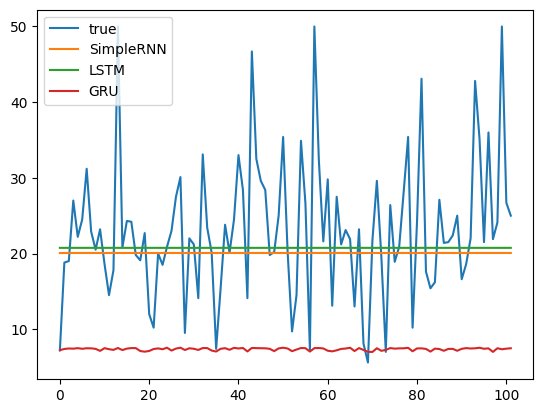

In [31]:
# Plot predictions vs true values
plt.plot(y_test, label='true')
plt.plot(y_pred_1, label='SimpleRNN')
plt.plot(y_pred_2, label='LSTM')
plt.plot(y_pred_3, label='GRU')
plt.legend()
plt.show()

# Zadanie 8 - Modyfikacje
Dokonaj modyfikacji.
Wykorzystujac [funkcje straty](https://keras.io/api/losses/) z biblioteki KERAS oraz dostępne tam [optymalizatory](https://keras.io/api/optimizers/) dokonaj porównania:

- 3 sieci LSTM
- 3 sieci SimpleRNN
- 3 sieci GRU

dla zbioru [Boston Housing](https://keras.io/api/datasets/boston_housing/)

Najistotniejsze w tym zadaniu jest wykorzystanie 3różnych optymalizatorów i funkcji straty dla danej architektury sieci neuronowej i zestawienie wyników. Czy jest zauważalny wpływ na osiągnięte wyniki? Wykorzystaj optymalizatory oraz funkcje straty w sposob **logiczny**.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
SimpleRNN with Adam and mse MSE: 67.40718098020453
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
SimpleRNN with RMSprop and mae MSE: 88.19732052782835
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
SimpleRNN with Adagrad and mean_squared_logarithmic_error MSE: 366.1090588082445
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
LSTM with Adam and mse MSE: 89.19499757066345
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
LSTM with RMSprop and mae MSE: 99.39892659580931
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
LSTM with Adagrad and mean_squared_logarithmic_error MSE: 425.96925440013524
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
GRU with Adam and mse MSE: 87.68124704822064
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
GRU with RMSprop and mae MSE: 88.9079631647907
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
GRU with Adagrad and mean_squared_logarithmic_error MSE: 348.4506989346339


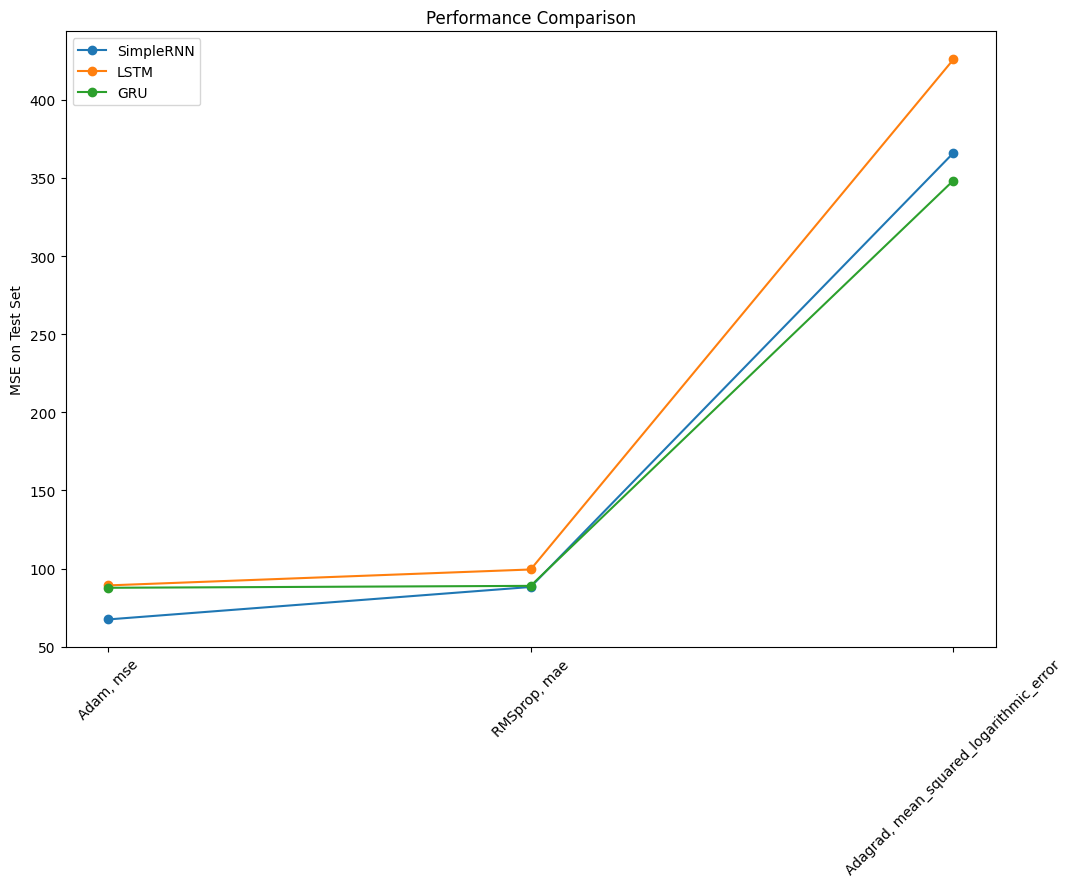

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM, GRU
from keras.optimizers import Adam, RMSprop, Adagrad
from sklearn.preprocessing import StandardScaler

# Load and scale the data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
def build_model(rnn_layer, units, optimizer, loss_func):
    model = Sequential()
    model.add(rnn_layer(units=units, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(rnn_layer(units=units//2, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer(), loss=loss_func)
    return model

# Define optimizers and loss functions
optimizers = [Adam, RMSprop, Adagrad]
losses = ['mse', 'mae', 'mean_squared_logarithmic_error']
rnn_layers = [SimpleRNN, LSTM, GRU]
results = {}

# Training and evaluating models
for rnn_layer in rnn_layers:
    layer_name = rnn_layer.__name__
    results[layer_name] = {}
    for optimizer, loss_func in zip(optimizers, losses):
        model = build_model(rnn_layer, 64, optimizer, loss_func)
        model.fit(X_train_scaled[:,:,np.newaxis], y_train, batch_size=32, epochs=50, verbose=0)
        y_pred = model.predict(X_test_scaled[:,:,np.newaxis]).flatten()
        mse = np.mean((y_test - y_pred)**2)
        results[layer_name][f'{optimizer.__name__}, {loss_func}'] = mse
        print(f'{layer_name} with {optimizer.__name__} and {loss_func} MSE: {mse}')

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))
for layer, metrics in results.items():
    optimizers = list(metrics.keys())
    mse_scores = list(metrics.values())
    ax.plot(optimizers, mse_scores, marker='o', label=f'{layer}')

ax.set_ylabel('MSE on Test Set')
ax.set_title('Performance Comparison')
ax.set_xticks(optimizers)
ax.set_xticklabels(optimizers, rotation=45)
ax.legend()
plt.show()
